<a href="https://colab.research.google.com/github/oliveiraprg/formacao-cientista-de-dados/blob/main/limpeza_de_dados_tempo_atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import seaborn as srn
import statistics as sts

#Carregando, verificando e fazendo correções necessárias

In [198]:
dataset = pd.read_csv("/content/tempo.csv", sep=';')
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [199]:
dataset.shape

(14, 5)

# Análise Exploratória dos dados

##Verificando a distribuição dos dados

###Dados NAs


In [200]:
#Verificando colunas com valores NAs
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


###Dados sobre a Aparência

In [201]:
#Verificando dados sobre a Aparência
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


###Dados sobre o Vento

In [202]:
#Verificando dados sobre a Vento
agrupado_vento = dataset.groupby(['Vento']).size()
agrupado_vento

,0
Vento,
FALSO,7
VERDADEIRO,6


###Dados sobre Jogar

In [203]:
#Verificando dados sobre a Jogar
agrupado_jogar = dataset.groupby(['Jogar']).size()
agrupado_jogar

,0
Jogar,
nao,5
sim,9


###Dados sobre a Temperatura

In [204]:
#Verificando valores fora do dominio da Temperatura
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


Text(0.5, 1.0, 'Temperatura')

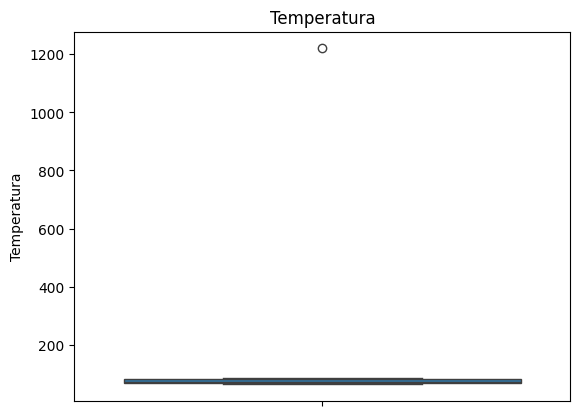

In [205]:
#Verificando valores da Temperatura
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

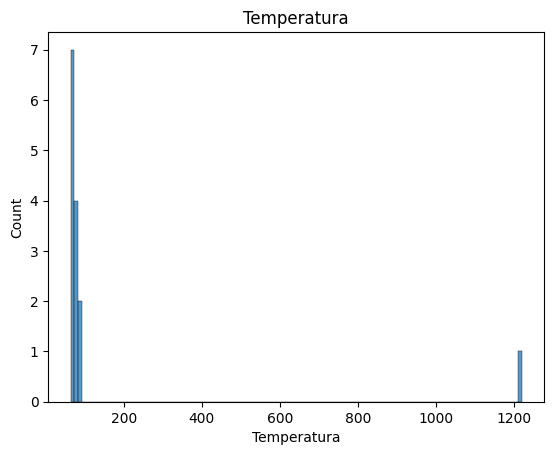

In [206]:
#Verificando valores da Temperatura
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

###Dados sobre a Umidade

In [207]:
#Verificando valores fora do dominio da Umidade
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


Text(0.5, 1.0, 'Umidade')

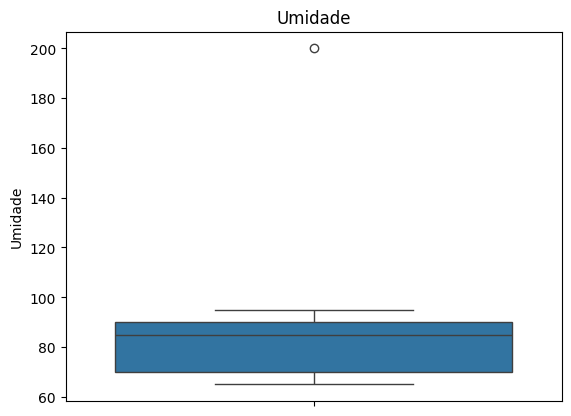

In [208]:
#Verificando valores da Umidade
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

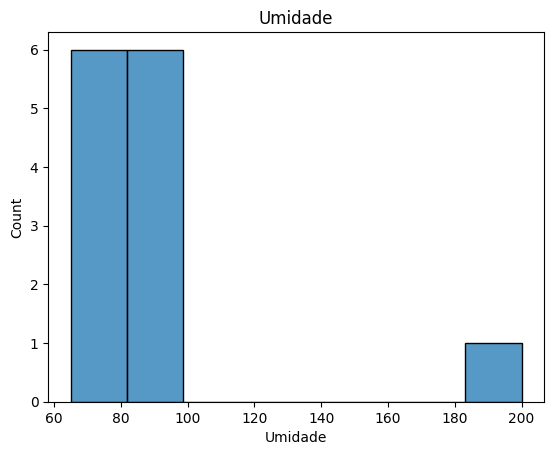

In [209]:
#Verificando valores da Umidade
srn.histplot(dataset['Umidade']).set_title('Umidade')

In [210]:
#Verificando os dados
dataset['Umidade'].describe()

,Umidade
count,13.000000
mean,89.769231
std,34.540203
min,65.000000
25%,70.000000
50%,85.000000
75%,90.000000
max,200.000000


#Tratamento dos dados

##Tratando dados NAs

In [211]:
#Verificando os NAs do Vento
dataset['Vento'].isnull().sum()

1

In [212]:
#Prenchendo NAs com a MODA
dataset['Vento'].fillna('FALSO', inplace=True)

In [213]:
#Verificando os NAs do Umidade
dataset['Umidade'].isnull().sum()

1

In [214]:
#Calculando a mediana da Umidade
mediana_umidade = sts.median(dataset['Umidade'])
mediana_umidade

85.5

In [215]:
#Prenchendo NAs com a MODA mediana
dataset['Umidade'].fillna(mediana_umidade, inplace=True)

##Tratando dados historícos


In [216]:
#Padronizar os valores da aparência de acordo com o domínio
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

##Tratando dados numéricos

In [217]:
#Verificando e tratando valores fora dados do dominio da Umidade
dataset['Umidade'].describe()
dataset.loc[(dataset['Umidade'] < 0.0) | (dataset['Umidade'] > 100.0), 'Umidade'] = mediana_umidade

In [221]:
# #Calculando a mediana da Temperatura
dataset['Temperatura'].describe()
mediana_temperatura = sts.median(dataset['Temperatura'])
mediana_temperatura
# #Verificando valores e tratando dados fora do dominio da Temperatura
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana_temperatura

#Verificação dos dados tratados

In [222]:
#Verificando colunas com valores NAs
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,0
Vento,0
Jogar,0


In [224]:
dataset.head()


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [225]:
#Verificando dados sobre a Aparência
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia

,0
Aparencia,
chuva,6
nublado,3
sol,5
